In [768]:
import torchvision.transforms as transforms
import torch
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image

In [769]:
lpr_transform = transforms.Compose([
    transforms.Resize((64, 128)),
    transforms.ColorJitter(brightness=0.5, contrast=0.2, saturation=0.3, hue=0.2),
    transforms.RandomRotation(degrees=7),
    transforms.RandomAffine(degrees=7, translate=(0.05, 0.05), scale=(0.85, 1.05), shear=10),
    transforms.GaussianBlur(kernel_size=(5, 5), sigma=4.0),
    transforms.RandomPerspective(distortion_scale=0.2, p=0.5),
    transforms.ToTensor(),
])

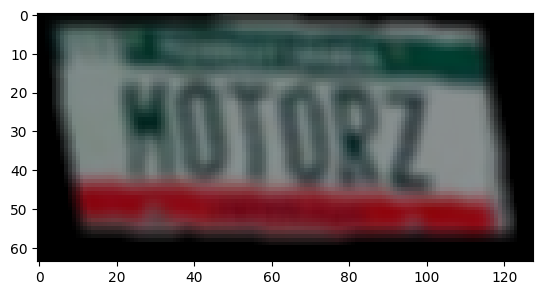

In [770]:
img = Image.open('data/pa958.png')
img = lpr_transform(img)
plt.imshow(img.permute(1, 2, 0))

In [771]:
def clear_directory_except_labels(dir_path):
    try:
        # List all files in the directory
        files = os.listdir(dir_path)
        
        for file in files:
            # Full path of the file
            file_path = os.path.join(dir_path, file)
            
            # Check if it's not a directory and the filename is not _labels.txt
            if os.path.isfile(file_path) and file != '_labels.txt':
                # Remove the file
                os.remove(file_path)
                print(f"Removed file: {file_path}")
        
        print("Directory cleaned, except for '_labels.txt'.")
        
    except Exception as e:
        print(f"Error: {e}")

# Example usage
clear_directory_except_labels('transformed_data/test')
clear_directory_except_labels('transformed_data/train')


Removed file: transformed_data/test/63.jpg
Removed file: transformed_data/test/823.jpg
Removed file: transformed_data/test/2100.jpg
Removed file: transformed_data/test/1409.jpg
Removed file: transformed_data/test/189.jpg
Removed file: transformed_data/test/2114.jpg
Removed file: transformed_data/test/77.jpg
Removed file: transformed_data/test/837.jpg
Removed file: transformed_data/test/1353.jpg
Removed file: transformed_data/test/1435.jpg
Removed file: transformed_data/test/2128.jpg
Removed file: transformed_data/test/1421.jpg
Removed file: transformed_data/test/1347.jpg
Removed file: transformed_data/test/638.jpg
Removed file: transformed_data/test/1390.jpg
Removed file: transformed_data/test/604.jpg
Removed file: transformed_data/test/162.jpg
Removed file: transformed_data/test/176.jpg
Removed file: transformed_data/test/88.jpg
Removed file: transformed_data/test/610.jpg
Removed file: transformed_data/test/1384.jpg
Removed file: transformed_data/test/1179.jpg
Removed file: transforme

In [772]:
num_transforms_per_image = 3
test_num = 30


with open('data/_labels.txt', 'r') as f:
    lines = list(map(lambda line: line.replace('\n','').split(' '), f.readlines()))
    filename_to_chars = { key: val for (key, val) in lines}
    
plate_files = list(filter(lambda filename: filename[-4:] == '.png', os.listdir('data')))

with open('transformed_data/train/_labels.txt', 'w') as f:
    counter = 0
    for file in plate_files[:-test_num]:
        target = filename_to_chars[file]
        base_image = Image.open(f'data/{file}')

        for _ in range(num_transforms_per_image):
            y = lpr_transform(base_image)
            export = y.permute(1,2,0).numpy()
            export = cv2.cvtColor(export, cv2.COLOR_RGB2BGR)
            cv2.imwrite(f'transformed_data/train/{counter}.jpg', export*255.0)
            f.write(f'{counter}.jpg {target}\n')
            
            counter += 1
            
            
with open('transformed_data/test/_labels.txt', 'w') as f:
    counter = 0
    for file in plate_files[:-test_num]:
        target = filename_to_chars[file]
        base_image = Image.open(f'data/{file}')

        for _ in range(num_transforms_per_image):
            y = lpr_transform(base_image)
            export = y.permute(1,2,0).numpy()
            export = cv2.cvtColor(export, cv2.COLOR_RGB2BGR)
            cv2.imwrite(f'transformed_data/test/{counter}.jpg', export*255.0)
            f.write(f'{counter}.jpg {target}\n')
            
            counter += 1